In [1]:
import json
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
def load_json(filename):
    with open(filename) as f:
        dict_list = [json.loads(line) for line in f]
    return dict_list

result_list = load_json('com_opt00')
# result_list = load_json('merge')

df_result = pd.DataFrame(result_list, columns=list(result_list[0].keys()))
df_result.head()
agg_dict = {key: 'mean' for key in result_list[0].keys()}
del agg_dict['ex_identifier']
del agg_dict['task_num']
del agg_dict['agent_num']


result_agg = df_result.groupby(['task_num'], as_index=False).agg(agg_dict)
show_grouped_result = pd.DataFrame(result_agg)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
show_grouped_result

,task_num,random_u,random_c,random_t,GreedyNE_u,GreedyNE_c,GreedyNE_t,GreedyNE_iter,CF_u,CF_c,CF_t,CF_iter,GA_u,GA_c,GA_t,GA_iter,int_GA_u,int_GA_iter,optimal_u,optimal_t
0,2,15.32,2.66,0.000060,46.97,7.53,0.000189,3.06,45.31,6.93,0.000160,3.34,47.52,7.61,0.922542,100.00,47.52,0.00,47.52,0.000334
1,3,30.89,7.28,0.000176,73.69,14.19,0.000219,3.50,72.66,12.32,0.000615,4.61,78.87,14.01,0.984819,100.15,78.53,0.02,79.07,0.001374
2,4,51.35,14.52,0.000030,108.63,19.78,0.000329,3.37,128.17,17.91,0.000755,6.27,133.55,19.31,1.088045,103.36,122.64,0.01,135.14,0.029916
3,5,70.13,18.83,0.000110,152.85,24.65,0.000615,4.88,165.34,23.26,0.001357,7.54,169.54,24.47,1.158242,104.02,149.60,0.03,173.67,0.373126
4,6,89.56,23.78,0.000100,198.55,29.88,0.000835,4.89,231.04,28.41,0.001996,9.44,230.45,29.62,1.290821,106.79,189.18,0.03,239.50,23.595383
5,7,110.40,28.91,0.000216,219.60,34.97,0.000954,5.07,269.52,33.61,0.002202,10.88,265.29,34.75,1.378396,108.09,211.98,0.02,278.21,190.097052
6,8,118.56,32.72,0.000366,259.36,39.98,0.001214,5.59,321.15,38.46,0.002619,11.99,312.13,39.69,1.401505,110.88,240.51,0.02,332.54,2150.662571
7,9,139.10,38.90,0.000199,275.00,45.00,0.001295,5.30,365.60,43.90,0.002793,12.30,336.80,44.80,1.477794,106.70,262.50,0.00,371.90,9624.446925
8,10,163.10,45.30,0.000296,316.70,50.00,0.001626,5.90,395.30,48.90,0.002590,12.50,362.40,49.80,1.490590,106.80,289.00,0.00,403.20,75224.984217


In [3]:
ne_t = []
ind = 0
for i in range(0, len(result_list)):
    if result_list[i]['task_num'] == 2:
        ne_t.append(result_list[i]['GreedyNE_t'])

print(ne_t)
print(len(ne_t))
print(max(ne_t))
print(ne_t.index(max(ne_t)))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009975433349609375, 0.0, 0.0, 0.000997304916381836, 0.0, 0.0009970664978027344, 0.0009980201721191406, 0.0, 0.0009968280792236328, 0.0, 0.0, 0.000997304916381836, 0.0, 0.0009970664978027344, 0.0009679794311523438, 0.0009984970092773438, 0.0, 0.0, 0.000997304916381836, 0.0, 0.0009970664978027344, 0.0009984970092773438, 0.0, 0.0, 0.000997781753540039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000997781753540039, 0.0009970664978027344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000994781753540039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009975433349609375, 0.0, 0.0, 0.0, 0.0, 0.0009970664978027344, 0.0009970664978027344, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
100
0.0009984970092773438
27


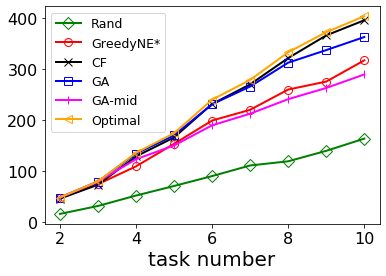

In [5]:
# utility
plt.figure()
x = result_agg['task_num']
y1 = result_agg['random_u']
plt.plot(x, y1, 'b-', linewidth=2, color='green', marker='D', fillstyle='none', markersize=8)

# y2 = result_agg['LS_CF_u']
# plt.plot(x, y2, 'b-', linewidth=2, color='orange', marker='^', fillstyle='none', markersize=8)

y3 = result_agg['GreedyNE_u']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)

y4 = result_agg['CF_u']
plt.plot(x, y4, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)

y5 = result_agg['GA_u']
plt.plot(x, y5, 'b-', linewidth=2, color='blue', marker='s', fillstyle='none', markersize=8)

y6 = result_agg['int_GA_u']
plt.plot(x, y6, 'b-', linewidth=2, color='magenta', marker='|', fillstyle='none', markersize=8)

y7 = result_agg['optimal_u']
plt.plot(x, y7, 'b-', linewidth=2, color='orange', marker='<', fillstyle='none', markersize=8)


plt.legend(['Rand', 'GreedyNE*', 'CF', 'GA', 'GA-mid', 'Optimal'], fontsize=12.5)
# plt.plot(x,y1,'b-',label="0.5x+1")
# ax = plt.gca()
# ax.set_yscale('log')
# plt.ylabel('utility', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=16)
# plt.savefig('compare_opt.pdf',bbox_inches='tight')

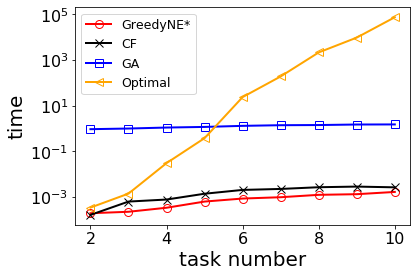

In [7]:
# utility
plt.figure()
x = result_agg['task_num']

y3 = result_agg['GreedyNE_t']
plt.plot(x, y3, 'b-', linewidth=2, color='red', marker='o', fillstyle='none', markersize=8)

y4 = result_agg['CF_t']
plt.plot(x, y4, 'b-', linewidth=2, color='black', marker='x', fillstyle='none', markersize=8)

y5 = result_agg['GA_t']
plt.plot(x, y5, 'b-', linewidth=2, color='blue', marker='s', fillstyle='none', markersize=8)


y7 = result_agg['optimal_t']
plt.plot(x, y7, 'b-', linewidth=2, color='orange', marker='<', fillstyle='none', markersize=8)


plt.legend(['GreedyNE*', 'CF', 'GA', 'Optimal'], fontsize=12.5)
# plt.plot(x,y1,'b-',label="0.5x+1")
ax = plt.gca()
ax.set_yscale('log')
# plt.ylabel('time', fontsize=20)
plt.xlabel('task number', fontsize=20)
plt.tick_params(labelsize=16)
# plt.savefig('compare_opt_t.pdf',bbox_inches='tight')

In [ ]:
result_list = load_json('discuss_gen_CF_GA')

df_result = pd.DataFrame(result_list, columns=list(result_list[0].keys()))
df_result.head()
agg_dict = {key: 'mean' for key in result_list[0].keys()}
del agg_dict['ex_identifier']
del agg_dict['task_num']
del agg_dict['agent_num']


result_agg = df_result.groupby(['task_num'], as_index=False).agg(agg_dict)
show_grouped_result = pd.DataFrame(result_agg)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
show_grouped_result
############### Compare GA and CF #######################
exp_times = len(result_list)/len(result_agg)
exp_ind = list(range(0, int(exp_times)))
tasks = [result_list[i]['task_num'] for i in range(0, len(result_agg))]
CF_u = [[] for i in range(0, len(tasks))]
GA_u = [[] for i in range(0, len(tasks))]
extra_ind = [[] for i in range(0, len(tasks))]
for t in tasks:
    t_ind = tasks.index(t)
    for i in range(0, len(result_list)):
        if result_list[i]['task_num'] == t:
            CF_u[t_ind].append(result_list[i]['CF_u'])
            GA_u[t_ind].append(result_list[i]['GA_u'])
        extra_ind[t_ind].append(result_list[i]['ex_identifier'])

GA_better_CF = [0 for i in list(range(0, len(tasks)))] 
CF_better_GA = [0 for i in list(range(0, len(tasks)))] 
equal = [0 for i in list(range(0, len(tasks)))] 
for k in exp_ind:
    for i in range(0, len(tasks)): 
        if GA_u[i][k] > CF_u[i][k]:
            GA_better_CF[i] += 1   
        if GA_u[i][k] < CF_u[i][k]:
            CF_better_GA[i] += 1
        if GA_u[i][k] == CF_u[i][k]:
            equal[i] += 1

print(GA_better_CF)  
print(CF_better_GA) 
print(equal)
